# Detection Task

## Installation and Setup
For installation and setting up the repo, please refer to the [Installation Notebook](000_install.ipynb). 

In [1]:
import os
from utils.io import setup_repo

# Setup repo and checkout to the branch with the tutorials
setup_repo(
    git_url="https://github.com/openvinotoolkit/training_extensions.git",
    branch='tutorials/cvpr24',
)
os.getcwd()

'/home/sakcay/projects/training_extensions'

The above code will setup the repo, change the directory to the root directory of the repo, so we have access to all the files and folders in the repo.

## Prepare the Data

The first step is to prepare the dataset. If you haven't downloaded the dataset yet, you could download it via the following:

In [2]:
from notebooks.utils.download import download_dataset

download_dataset(
    url=(
        "https://github.com/openvinotoolkit/training_extensions/releases/download"
        "/fruits_and_vegetables_dataset/fruits_and_vegetables.zip"
    ),
    extract_to="data/fruits_and_vegetables"
)

The dataset is already available in data/fruits_and_vegetables


In [3]:
data_root = "./data/fruits_and_vegetables"
work_dir = "./otx-workspace-det"

## Training with OTX Recipes
The first step in this task is to train a model using OTX recipes, which are available in the `recipes` folder. The recipes are in the form of `.yaml` files, which can be used to train a model using the `otx` library.

These recipes are pre-defined by the OTX, which are validated and tested to work with many different use-cases.

Let's see the available recipes for `DETECTION` task.

In [5]:
from otx.engine.utils.api import list_models

available_models = list_models(task="DETECTION", print_table=True)

                                           OTX Recipes                                                    
         ┏━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓         
         ┃ Task      ┃ Model Name            ┃ Recipe Path                                               ┃         
         ┡━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩         
         │ DETECTION │ atss_mobilenetv2      │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/atss_mobilenetv2.yaml                           │         
         │ DETECTION │ atss_resnext101       │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/atss_resnext101.yaml                            │         
         │ DETECTION │ yolox_x_tile          │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_x_tile.yaml                               │         
         │ DETECTION │ yolox_l_tile          │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_l_tile.yaml                               │         
         │ DETECTION │ openvino_model        │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/openvino_model.yaml                             │         
         │ DETECTION │ ssd_mobilenetv2       │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/ssd_mobilenetv2.yaml                            │         
         │ DETECTION │ yolox_x               │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_x.yaml                                    │         
         │ DETECTION │ yolox_tiny            │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_tiny.yaml                                 │         
         │ DETECTION │ yolox_tiny_tile       │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_tiny_tile.yaml                            │         
         │ DETECTION │ ssd_mobilenetv2_tile  │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/ssd_mobilenetv2_tile.yaml                       │         
         │ DETECTION │ yolox_s               │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_s.yaml                                    │         
         │ DETECTION │ yolox_l               │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_l.yaml                                    │         
         │ DETECTION │ atss_mobilenetv2_tile │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/atss_mobilenetv2_tile.yaml                      │         
         │ DETECTION │ yolox_s_tile          │ /home/sakcay/projects/training_extensions/src/otx/recipe/ │         
         │           │                       │ detection/yolox_s_tile.yaml                               │         
         └───────────┴───────────────────────┴───────────────────────────────────────────────────────────┘

As we can see from the output of the above cell, there are +10 recipes available for the `DETECTION` task. We can use any of these recipes to train a model. In this example, we will use the `yolox_s.yaml` recipe to train a model.

In [6]:
from otx.engine import Engine

recipe = "src/otx/recipe/detection/yolox_s.yaml"
override_dataset_format = {"data.config.data_format": "datumaro"}

engine = Engine.from_config(config_path=recipe, data_root=data_root, work_dir=work_dir, **override_dataset_format)
engine.train(max_epochs=30)

/home/sakcay/projects/training_extensions/src/otx/core/data/module.py:62: UserWarning: There are empty annotation items in train set, Of these, only 0.0% are used.
  dataset = pre_filtering(dataset, self.config.data_format, self.config.unannotated_items_ratio)
/home/sakcay/projects/training_extensions/src/otx/cli/cli.py:389: UserWarning: Automatically infer label_info from the given dataset. Then, giving it to the OTXModel.__init__() argument. If you don't want this behavior, please use `--disable-infer-num-classes` option.
  warn(warning_msg, stacklevel=0)
Downloading: "https://download.openmmlab.com/mmdetection/v2.0/yolox/yolox_s_8x8_300e_coco/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth" to /home/sakcay/.cache/torch/hub/checkpoints/yolox_s_8x8_300e_coco_20211121_095711-4592a793.pth
/home/sakcay/projects/training_extensions/src/otx/algo/utils/mmengine_utils.py:183: UserWarning: The model and loaded state dict do not match exactly

size mismatch for bbox_head.multi_level_conv_cl

┏━━━┳━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓
┃   ┃ Name  ┃ Type                ┃ Params ┃
┡━━━╇━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩
│ 0 │ model │ SingleStageDetector │  8.9 M │
└───┴───────┴─────────────────────┴────────┘

Trainable params: 8.9 M                                                                                            
Non-trainable params: 0                                                                                            
Total params: 8.9 M                                                                                                
Total estimated model params size (MB): 35

/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/torch/utils/data/sampler.py:64: UserWarning: `data_source` argument is not used and will be removed in 2.2.0.You may still have custom implementation that utilizes it.
  warnings.warn("`data_source` argument is not used and will be removed in 2.2.0."


Output()

/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/lightning/pytorch/loops/fit_loop.py:293: The number of training batches (12) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.


/home/sakcay/.pyenv/versions/3.11.9/envs/otx/lib/python3.11/site-packages/torch/functional.py:504: UserWarning: 
torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at
../aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]

/home/sakcay/projects/training_extensions/src/otx/core/model/base.py:348: UserWarning: Log metric name=val/classes 
is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

{'lr-SGD': tensor(1.0000e-04),
 'lr-SGD-momentum': tensor(0.9000),
 'lr-SGD-1': tensor(1.0000e-04),
 'lr-SGD-1-momentum': tensor(0.9000),
 'train/loss_cls': tensor(0.8002),
 'train/loss_bbox': tensor(1.1749),
 'train/loss_obj': tensor(1.1830),
 'train/loss': tensor(3.1582),
 'train/data_time': tensor(0.0118),
 'train/iter_time': tensor(0.1313),
 'validation/data_time': tensor(0.0138),
 'validation/iter_time': tensor(0.0504),
 'val/map': tensor(0.8314),
 'val/map_50': tensor(0.9999),
 'val/map_75': tensor(0.9934),
 'val/map_small': tensor(-1.),
 'val/map_medium': tensor(0.8171),
 'val/map_large': tensor(0.8266),
 'val/mar_1': tensor(0.5120),
 'val/mar_10': tensor(0.8448),
 'val/mar_100': tensor(0.8457),
 'val/mar_small': tensor(-1.),
 'val/mar_medium': tensor(0.8246),
 'val/mar_large': tensor(0.8429),
 'val/map_per_class': tensor(-1.),
 'val/mar_100_per_class': tensor(-1.),
 'val/f1-score': tensor(0.9918)}

## Evaluate torch model
Now that the training is complete, we could test the performance of the model on a test set. 

In [7]:
engine.test()

Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3]


Output()

/home/sakcay/projects/training_extensions/src/otx/core/model/base.py:348: UserWarning: Log metric name=test/classes
is not a scalar tensor. Skip logging it.
  warnings.warn(msg, stacklevel=1)

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│      test/data_time       │   0.026601020246744156    │
│       test/f1-score       │    0.9729729890823364     │
│      test/iter_time       │    0.06911403685808182    │
│         test/map          │    0.7539737224578857     │
│        test/map_50        │    0.9811425805091858     │
│        test/map_75        │    0.9226470589637756     │
│      test/map_large       │     0.744737446308136     │
│      test/map_medium      │    0.8090808987617493     │
│    test/map_per_class     │           -1.0            │
│      test/map_small       │            0.0            │
│        test/mar_1         │    0.4381360709667206     │
│        test/mar_10        │    0.7818199992179871     │
│       test/mar_100        │    0.7830051779747009     │
│  test/mar_100_per_class   │           -1.0            │
│      test/mar_large       │    0.7744680047035217     │
│      test/mar_medium      │    0.8274813890457153     │
│      test/mar_small       │            0.0            │
└───────────────────────────┴───────────────────────────┘

{'test/data_time': tensor(0.0266),
 'test/iter_time': tensor(0.0691),
 'test/map': tensor(0.7540),
 'test/map_50': tensor(0.9811),
 'test/map_75': tensor(0.9226),
 'test/map_small': tensor(0.),
 'test/map_medium': tensor(0.8091),
 'test/map_large': tensor(0.7447),
 'test/mar_1': tensor(0.4381),
 'test/mar_10': tensor(0.7818),
 'test/mar_100': tensor(0.7830),
 'test/mar_small': tensor(0.),
 'test/mar_medium': tensor(0.8275),
 'test/mar_large': tensor(0.7745),
 'test/map_per_class': tensor(-1.),
 'test/mar_100_per_class': tensor(-1.),
 'test/f1-score': tensor(0.9730)}

With roughly about 20 epochs, we manage to get +98% performance on detection task. It is now possible to explore how the model makes a prediction by `Engine`'s `explain` method, which uses Explainable AI under the hood.

## Explain torch model

In [ ]:
from otx.core.config.explain import ExplainConfig

engine.explain(explain_config=ExplainConfig(postprocess=True), dump=True)

The code above will save the predictions into filesytem, from which we could visualize the results. For example, let's visualize the following samples:

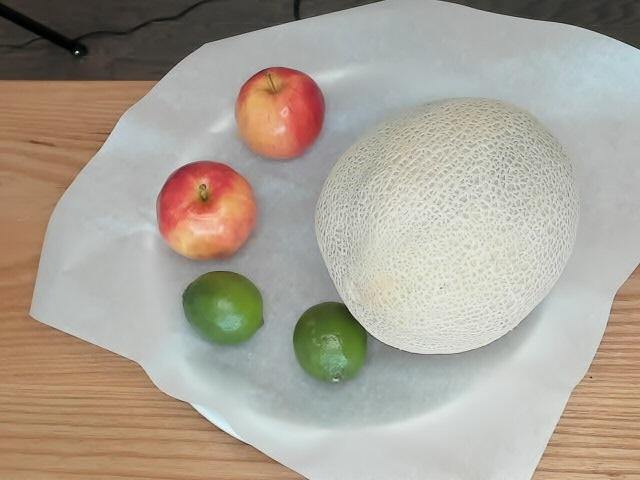

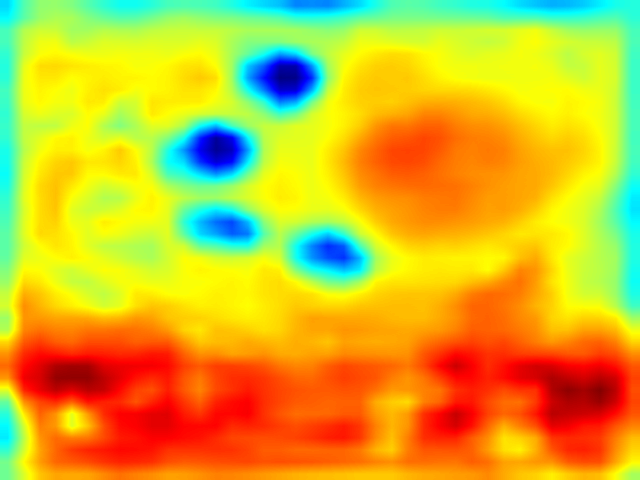

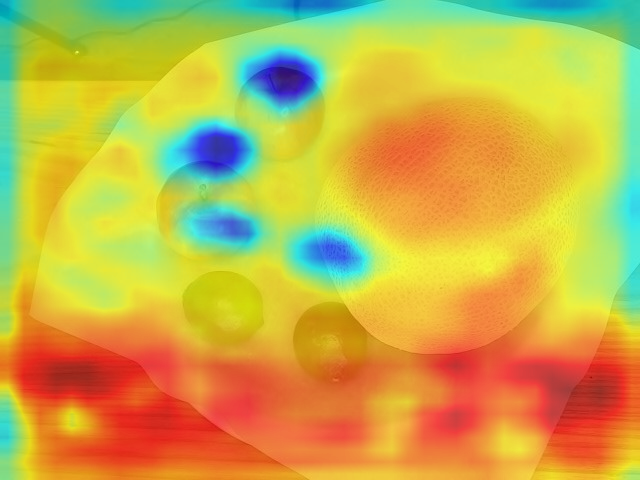

In [9]:
from PIL import Image
from IPython.display import display

original_image = Image.open(f'{data_root}/images/test/my_photo-1 - Copy - Copy - Copy.jpg')
saliency_map = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_saliency_map.png')
overlayed_image = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_overlay.png')

display(original_image)
display(saliency_map)
display(overlayed_image)

## Export to IR Model
After we ensure the model is making the right predictions and are happy with the model to deploy, the next step is to export the model to IR format. This is particularly useful to improve the inference speed on edge devices. 

In [7]:
exported_ir_model_path = engine.export()
exported_ir_model_path

Trainer will use only 1 of 2 GPUs because it is running inside an interactive / notebook environment. You may try to set `Trainer(devices=2)` but please note that multi-GPU inside interactive / notebook environments is considered experimental and unstable. Your mileage may vary.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
/home/harimkan/workspace/repo/otx-regression/src/otx/algo/detection/yolox.py:203: TracerWarning: Converting a tensor to a Python integer might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  shape = (int(inputs.shape[2]), int(inputs.shape[3]))
/home/harimkan/workspace/repo/otx-regression/src/otx/algo/detection/yolox.py:211: TracerWarning: Using len to get tensor shape might cause the trace to be incorrect. 

PosixPath('/home/harimkan/workspace/repo/otx-regression/notebooks/otx-workspace-det/exported_model.xml')

## Evaluate IR Model
After exporting the model, we would like to ensure that accuracy has not dropped. Let's check it.

In [8]:
engine.test(checkpoint=exported_ir_model_path)

/home/harimkan/workspace/repo/otx-regression/src/otx/core/utils/build.py:52: UserWarning: Set the default number of OpenVINO inference requests to 8.
            You can specify the value in config.
  warnings.warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/engine/engine.py:346: UserWarning: IR model supports inference only on CPU device. The device is changed automatic.
  warn(msg, stacklevel=1)
/home/harimkan/workspace/repo/otx-regression/src/otx/engine/utils/auto_configurator.py:395: UserWarning: For OpenVINO IR models, Update the following test 
	 transforms: [{'class_path': 'torchvision.transforms.v2.ToImage'}] 
	 transform_lib_type: TORCHVISION 
	 batch_size: 64 
And the tiler is disabled.
  warn(msg, stacklevel=1)
Trainer already configured with model summary callbacks: [<class 'lightning.pytorch.callbacks.rich_model_summary.RichModelSummary'>]. Skipping setting a default `ModelSummary` callback.
GPU available: True (cuda), used: False
TPU available:

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test/map          │    0.5007342100143433     │
│        test/map_50        │    0.7040161490440369     │
│        test/map_75        │    0.6246165037155151     │
│      test/map_large       │    0.48593395948410034    │
│      test/map_medium      │    0.33197811245918274    │
│    test/map_per_class     │           -1.0            │
│      test/map_small       │            0.0            │
│        test/mar_1         │    0.35483554005622864    │
│        test/mar_10        │     0.533888578414917     │
│       test/mar_100        │     0.533888578414917     │
│  test/mar_100_per_class   │           -1.0            │
│      test/mar_large       │    0.5099062323570251     │
│      test/mar_medium      │    0.36392492055892944    │
│      test/mar_small       │            0.0            │
└───────────────────────────┴───────────────────────────┘

{'test/map': tensor(0.5007),
 'test/map_50': tensor(0.7040),
 'test/map_75': tensor(0.6246),
 'test/map_small': tensor(0.),
 'test/map_medium': tensor(0.3320),
 'test/map_large': tensor(0.4859),
 'test/mar_1': tensor(0.3548),
 'test/mar_10': tensor(0.5339),
 'test/mar_100': tensor(0.5339),
 'test/mar_small': tensor(0.),
 'test/mar_medium': tensor(0.3639),
 'test/mar_large': tensor(0.5099),
 'test/map_per_class': tensor(-1.),
 'test/mar_100_per_class': tensor(-1.)}

As we can see above, the accuracy remains the same despite the model is optimized to run significantly faster.

## Explain IR model
Similar to the previous section, we could visualize the model predictions by calling the `explain` method.

In [ ]:
from otx.core.config.explain import ExplainConfig

predictions = engine.explain(
    checkpoint=exported_ir_model_path,
    explain_config=ExplainConfig(postprocess=True),
    dump=True,
)

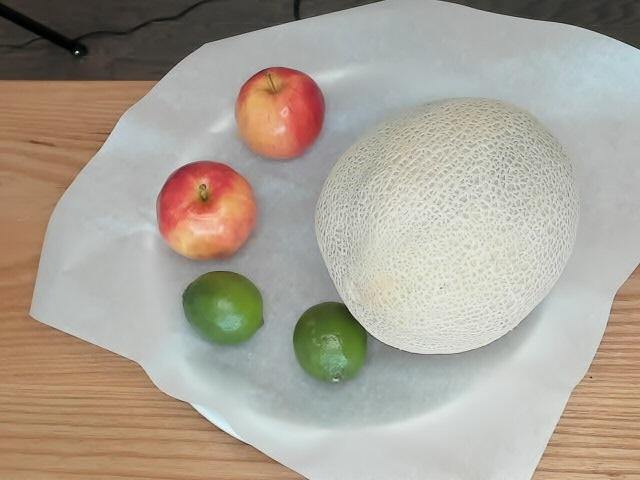

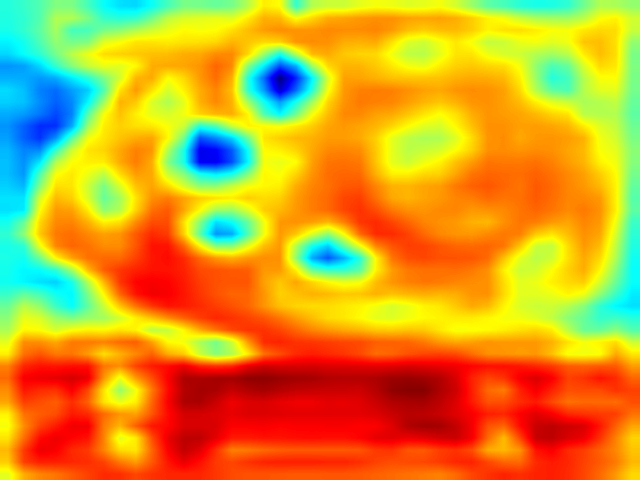

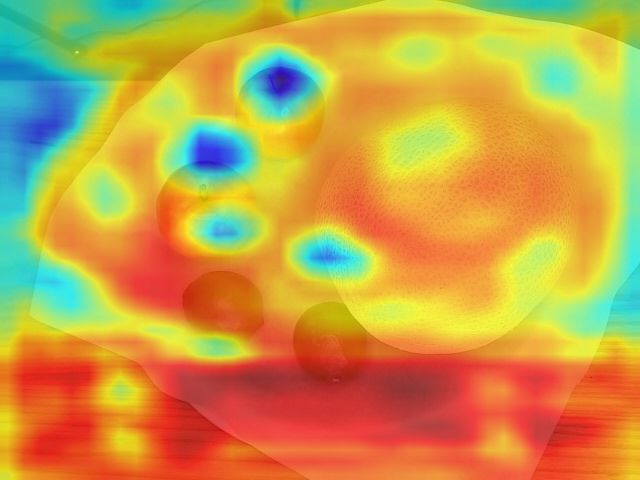

In [10]:
from PIL import Image
from IPython.display import display

original_image = Image.open(f'{data_root}/images/test/my_photo-1 - Copy - Copy - Copy.jpg')
saliency_map = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_saliency_map.png')
overlayed_image = Image.open(f'{work_dir}/saliency_map/my_photo_1___Copy___Copy___Copy_class_0_overlay.png')

display(original_image)
display(saliency_map)
display(overlayed_image)